In [1]:
import os
import seaborn as sns 
import random
import matplotlib.pyplot as plt
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

Mounting Google Drive


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'Colab Notebooks'   flowers.rar  'GRE 1.pdf'  'GRE 2.pdf'  'My Drive'


Exttracting Files on colab storage

In [ ]:
!unrar x /mydrive/flowers.rar

Getting count of images in each category

In [4]:
names=[]
for folder in os.listdir('flowers'):
  names.append(folder)
  print(folder+': '+str(len(os.listdir('flowers/'+folder))))

rose: 784
tulip: 984
dandelion: 1055
daisy: 769
sunflower: 734


Preparing Train and test data

In [5]:
!mkdir train
!mkdir test

In [6]:
for i in names:
  os.mkdir('train/'+i)
  os.mkdir('test/'+i) 

Splitting 85-15

In [7]:
def split_data(source,train,test):
  files= []
  for filename in os.listdir(source):
    file = source + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename + " is zero length, so ignoring.")

  training_length = int(len(files) * 0.9)
  testing_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  testing_set = shuffled_set[-testing_length:]

  for filename in training_set:
    this_file = source + filename
    destination = train + filename
    copyfile(this_file, destination)

  for filename in testing_set:
    this_file = source + filename
    destination = test + filename
    copyfile(this_file, destination)

  print('Done')

In [8]:
for i in names:
  split_data('flowers/'+i+'/','train/'+i+'/','test/'+i+'/')

Done
Done
Done
Done
Done


In [9]:
print('Train Set')
for folder in os.listdir('train'):
  print(folder+': '+str(len(os.listdir('train/'+folder))))
print()
print('Test Set')
for folder in os.listdir('test'):
  print(folder+': '+str(len(os.listdir('test/'+folder))))  

Train Set
rose: 705
tulip: 885
dandelion: 949
daisy: 692
sunflower: 660

Test Set
rose: 79
tulip: 99
dandelion: 106
daisy: 77
sunflower: 74


Model Architecture

In [10]:
customModel1 = Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [11]:
customModel1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

Data Augmentation and Feeding image through nn



In [12]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	'train',
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	'test',
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64
)

Found 3888 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


In [15]:
customModel1.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history=customModel1.fit(train_generator, epochs=50, steps_per_epoch=61, validation_data = validation_generator, verbose = 1, validation_steps=7)

Epoch 1/50
61/61 [==============================] - 29s 473ms/step - loss: 0.9393 - accuracy: 0.6299 - val_loss: 0.8627 - val_accuracy: 0.6667
Epoch 2/50
61/61 [==============================] - 28s 467ms/step - loss: 0.8748 - accuracy: 0.6628 - val_loss: 0.7909 - val_accuracy: 0.6690
Epoch 3/50
61/61 [==============================] - 29s 472ms/step - loss: 0.8575 - accuracy: 0.6718 - val_loss: 0.7667 - val_accuracy: 0.6805
Epoch 4/50
61/61 [==============================] - 28s 460ms/step - loss: 0.8031 - accuracy: 0.6975 - val_loss: 0.7262 - val_accuracy: 0.7241
Epoch 5/50
61/61 [==============================] - 28s 466ms/step - loss: 0.7698 - accuracy: 0.7060 - val_loss: 0.7397 - val_accuracy: 0.7103
Epoch 6/50
61/61 [==============================] - 28s 458ms/step - loss: 0.7607 - accuracy: 0.7063 - val_loss: 0.6570 - val_accuracy: 0.7563
Epoch 7/50
61/61 [==============================] - 28s 462ms/step - loss: 0.7615 - accuracy: 0.7122 - val_loss: 0.6485 - val_accuracy: 0.7540

Plotting Loss and Accuracy

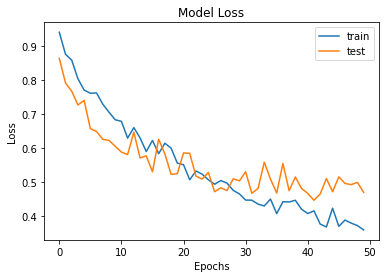

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

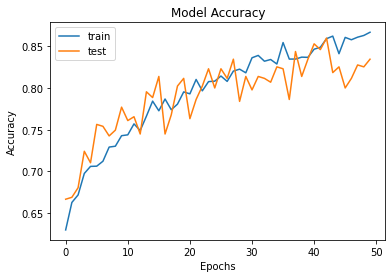

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()